### Analyses of output files from the pipeline optimus v6.0.0+
#### Aim of this part of analysis is to realize the clustering

#### Environment setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings("ignore") 

In [3]:
import scanpy as sc

#### Data Loading

In [4]:
input_h5ad = "../scAtlas/tmp/10k_pbmc_v3_out_dim_reduction.h5ad"
adata = sc.read_h5ad(input_h5ad)

In [5]:
display(adata)

AnnData object with n_obs × n_vars = 10214 × 58347
    obs: 'background_fraction', 'cell_probability', 'cell_size', 'droplet_efficiency', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'outlier', 'scDblFinder_score', 'scDblFinder_class', 'S_score', 'G2M_score', 'phase'
    var: 'ambient_expression', 'feature_type', 'genome', 'gene_id', 'cellbender_analyzed', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'barcode_indices_for_latents', 'barcodes_analyzed', 'barcodes_analyzed_inds', 'cell_size_lognormal_std', 'empty_droplet_size_lognormal_loc', 'empty_droplet_size_lognormal_scale', 'estimator', 'features_analyzed_inds', 'fraction_data_used_for_testing', 'hvg', 'learning_curve_learning_rate_epoch', 'learning_curve

#### Leiden clustering

In [6]:
seed = 22

In [7]:
sc.tl.leiden(adata, key_added="leiden_res0_25", resolution=0.25, random_state=seed)
sc.tl.leiden(adata, key_added="leiden_res0_5", resolution=0.5, random_state=seed)
sc.tl.leiden(adata, key_added="leiden_res0_75", resolution=0.75, random_state=seed)
sc.tl.leiden(adata, key_added="leiden_res1", resolution=1.0, random_state=seed)
sc.tl.leiden(adata, key_added="leiden_res1_5", resolution=1.5, random_state=seed)

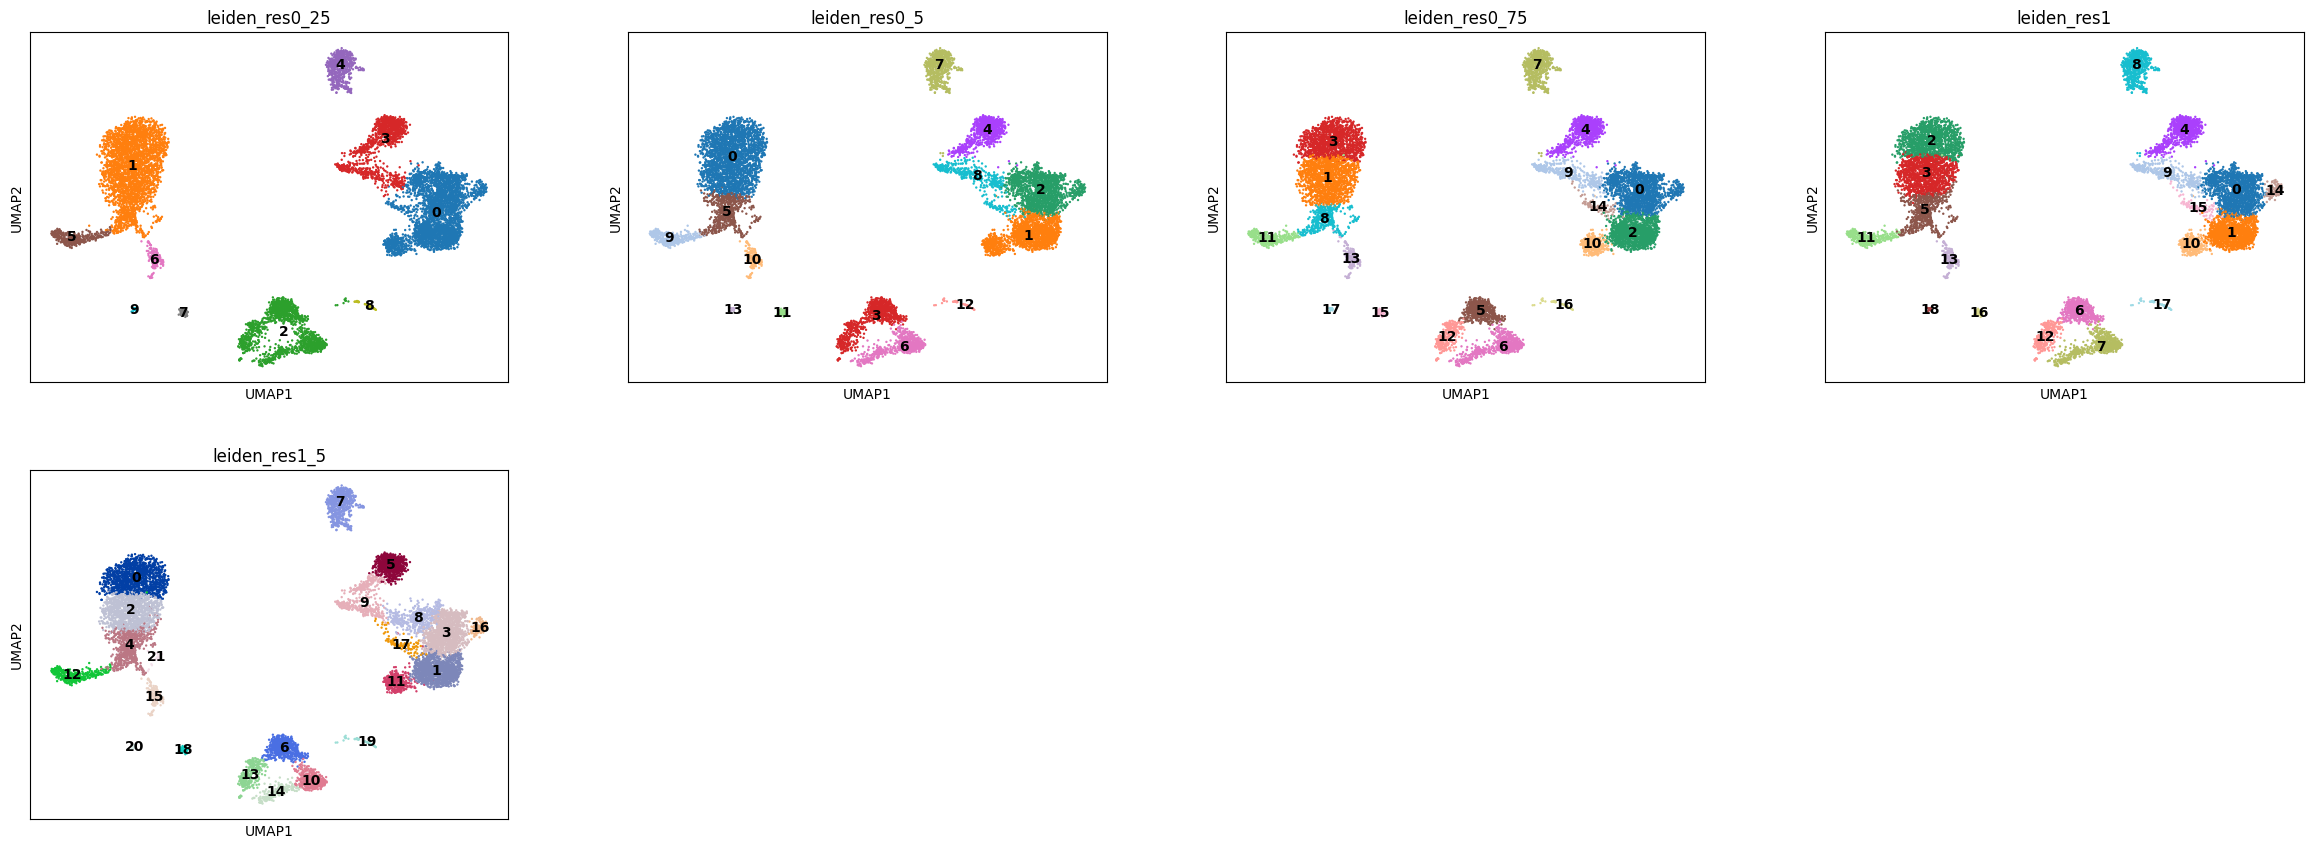

In [8]:
sc.pl.umap(
    adata,
    color=["leiden_res0_25", "leiden_res0_5", "leiden_res0_75", "leiden_res1", "leiden_res1_5"],
    legend_loc="on data",
)

###### small ilot: often the doublet

#### scTriangulate

In [9]:
import sctriangulate

In [10]:
# If you are using Mac or PC, set Matplotlib backend as Agg
sctriangulate.sctriangulate_setting(backend="Agg")

In [11]:
adata.X = adata.layers["log1p_norm"]

In [ ]:
scTri = sctriangulate.ScTriangulate(
    dir="../scAtlas/tmp/",
    adata=adata,
    query=["leiden_res0_25", "leiden_res0_5", "leiden_res0_75", "leiden_res1", "leiden_res1_5"],
)
scTri.lazy_run(compute_metrics_parallel=False)

In [ ]:
scTri = sctriangulate.ScTriangulate(
    dir="../scAtlas/tmp/",
    adata=adata,
    query=["leiden_res0_25", "leiden_res0_5"],
)
scTri.lazy_run(compute_metrics_parallel=False, layer='log1p_norm', assess_pruned=False,viewer_cluster=False,viewer_heterogeneity=False)
# TODO: to debug

In [17]:
scTri = sctriangulate.ScTriangulate(
    dir="../scAtlas/tmp/",
    adata=adata,
    query=["leiden_res0_25", "leiden_res0_5"],
)
scTri.compute_metrics(parallel=False)

2024-01-16 11:48:01,762 - INFO - Choosing logging to console (VERBOSE=1)
2024-01-16 11:48:01,762 - INFO - Choosing logging to console (VERBOSE=1)
2024-01-16 11:48:01,762 - INFO - Choosing logging to console (VERBOSE=1)
2024-01-16 11:48:01,762 - INFO - Choosing logging to console (VERBOSE=1)
2024-01-16 11:48:01,762 - INFO - Choosing logging to console (VERBOSE=1)
2024-01-16 11:48:01,762 - INFO - Choosing logging to console (VERBOSE=1)


2024-01-16 11:48:01,794 - INFO - skip scrublet doublet prediction, instead doublet is filled using value 0.5
2024-01-16 11:48:01,794 - INFO - skip scrublet doublet prediction, instead doublet is filled using value 0.5
2024-01-16 11:48:01,794 - INFO - skip scrublet doublet prediction, instead doublet is filled using value 0.5
2024-01-16 11:48:01,794 - INFO - skip scrublet doublet prediction, instead doublet is filled using value 0.5
2024-01-16 11:48:01,794 - INFO - skip scrublet doublet prediction, instead doublet is filled using value 0.5
2024-01-16 11:48:01,794 - INFO - skip scrublet doublet prediction, instead doublet is filled using value 0.5
2024-01-16 11:48:01,797 - INFO - choosing to compute metrics sequentially
2024-01-16 11:48:01,797 - INFO - choosing to compute metrics sequentially
2024-01-16 11:48:01,797 - INFO - choosing to compute metrics sequentially
2024-01-16 11:48:01,797 - INFO - choosing to compute metrics sequentially
2024-01-16 11:48:01,797 - INFO - choosing to compu

2024-01-16 11:48:28,500 - WARNING - Running GSEAPY for marker genes for leiden_res0_25, requires Internet connection (not an error, just reminder)
2024-01-16 11:48:28,500 - WARNING - Running GSEAPY for marker genes for leiden_res0_25, requires Internet connection (not an error, just reminder)
2024-01-16 11:48:28,500 - WARNING - Running GSEAPY for marker genes for leiden_res0_25, requires Internet connection (not an error, just reminder)
2024-01-16 11:48:28,500 - WARNING - Running GSEAPY for marker genes for leiden_res0_25, requires Internet connection (not an error, just reminder)
2024-01-16 11:48:28,500 - WARNING - Running GSEAPY for marker genes for leiden_res0_25, requires Internet connection (not an error, just reminder)
2024-01-16 11:48:28,500 - WARNING - Running GSEAPY for marker genes for leiden_res0_25, requires Internet connection (not an error, just reminder)


AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
sctri.serialize('break_point_after_metrics.p')

#### Write output to h5ad

In [20]:
adata.X = adata.layers["celbender_counts"]

In [22]:
PATH_TO_OUTPUT = "../scAtlas/tmp/10k_pbmc_v3_out_clustering.h5ad"
adata.write_h5ad(PATH_TO_OUTPUT)